In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'martial-status', 'occupation', 'relationship', 'race',
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'label']

train_df = pd.read_csv('adult.data',names = cols, header = None ,index_col = False)
test_df = pd.read_csv('adult.test',names = cols, header = None ,index_col = False, skiprows = 1)

In [3]:
train_df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [4]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# Data cleaning:
# education num is a label encoding, we want to do one-hot so we drop education-num
train_df = train_df.drop('education-num', axis='columns')
test_df = test_df.drop('education-num', axis='columns')

# drop all rows with unknown values
def clear_unknown_rows(df):
    df = df.replace(' ?',np.NaN)
    # existed in test but not training set, can do this in a better way but skipping for now
    df = df.replace(' Holand-Netherlands', np.NaN)
    df = df.dropna()
    return df

train_df = clear_unknown_rows(train_df)
test_df = clear_unknown_rows(test_df)

In [6]:
# one hot encoding
def encode_categories(df):
    # Workclass is 
    df = df.join(pd.get_dummies(df.pop('workclass')))
    
    df = df.join(pd.get_dummies(df.pop('education')))
    df = df.join(pd.get_dummies(df.pop('martial-status')))
    df = df.join(pd.get_dummies(df.pop('occupation')))
    df = df.join(pd.get_dummies(df.pop('relationship')))
    df = df.join(pd.get_dummies(df.pop('race')))
    df = df.join(pd.get_dummies(df.pop('sex')))
    df = df.join(pd.get_dummies(df.pop('native-country')))
    # label needs to be one column instead of two
    # need 4 because there's one with a period and one without
    df.replace({' <=50K.': 0, ' >50K.' : 1, ' <=50K': 0, ' >50K' : 1}, inplace=True)
    return df

train_df = encode_categories(train_df)
test_df = encode_categories(test_df)

train_df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,label,Federal-gov,Local-gov,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
numerical_df = train_df.copy()

In [8]:
# last step is to get the labels from the training set
train_labels_df = train_df['label']
test_labels_df = test_df['label']
train_df = train_df.drop(['label'],axis=1)
test_df = test_df.drop(['label'],axis=1)

In [9]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_df,train_labels_df)
y_pred = model.predict(test_df)

print("Accuracy:", metrics.accuracy_score(test_labels_df,y_pred))

Accuracy: 0.7882470119521913


In [10]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(train_df,train_labels_df)
y_pred = DTC.predict(test_df)

print("Accuracy:", metrics.accuracy_score(test_labels_df,y_pred))

Accuracy: 0.8101593625498008


In [11]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_df,train_labels_df)
y_pred=clf.predict(test_df)


print("Accuracy:", metrics.accuracy_score(test_labels_df,y_pred))

Accuracy: 0.8471447543160691


In [12]:
abs_corr_coeffs = numerical_df.corr()['label'].abs().sort_values()
abs_corr_coeffs

 Hungary               0.000872
 Greece                0.001932
 Assoc-acdm            0.002166
 Ireland               0.002650
 Cuba                  0.002918
                         ...   
age                    0.241991
 Never-married         0.320038
 Husband               0.401227
 Married-civ-spouse    0.445409
label                  1.000000
Name: label, Length: 103, dtype: float64

In [13]:
Feature_Series= numerical_df['age']
Label_Series = numerical_df['label']

Age_Label_df = pd.concat([Feature_Series,Label_Series], axis = 1)

In [14]:
numerical_df.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'label', ' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ...
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia'],
      dtype='object', length=103)

In [15]:
def stacked_bar_f(column):
    x = numerical_df[column]

    x1 = x[numerical_df['label']==1]
    #x2 = x[Age_Label_df['label']==0]

    label1 = ['Total People in' + column + 'Group']
    label2 = ['Percentage with $50K+ Salary']

    plt.figure()
    plt.hist(x , bins = 7 ,rwidth = 0.7 , stacked = True, ec = 'k',label = label1)
    plt.hist(x1 ,bins = 7, rwidth = 0.7, stacked = True, ec = 'k',label = label2)

    #plt.hist(x2,bins = 10, rwidth = 0.7, stacked = True)

    #plt.hist(x1/x2,bins = 7, rwidth = 0.5 , stacked = True)

    # plt.hist(x1, bins = 7, rwidth = 0.5, stacked = True, density = True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title( column +'vs Income')
    plt.legend()
    return plt.show()

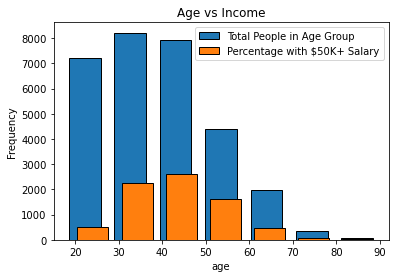

In [20]:
x = Age_Label_df['age']

x1 = x[Age_Label_df['label']==1]
x2 = x[Age_Label_df['label']==0]

label1 = ['Total People in Age Group']
label2 = ['Percentage with $50K+ Salary']

plt.figure()
plt.hist(x , bins = 7 ,rwidth = 0.7 , stacked = True, ec = 'k',label = label1)
plt.hist(x1 ,bins = 7, rwidth = 0.7, stacked = True, ec = 'k',label = label2)


plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age vs Income')
plt.legend()

Text(0.5, 1.0, 'Correlation Heatmap Matrix of Numerical Features')

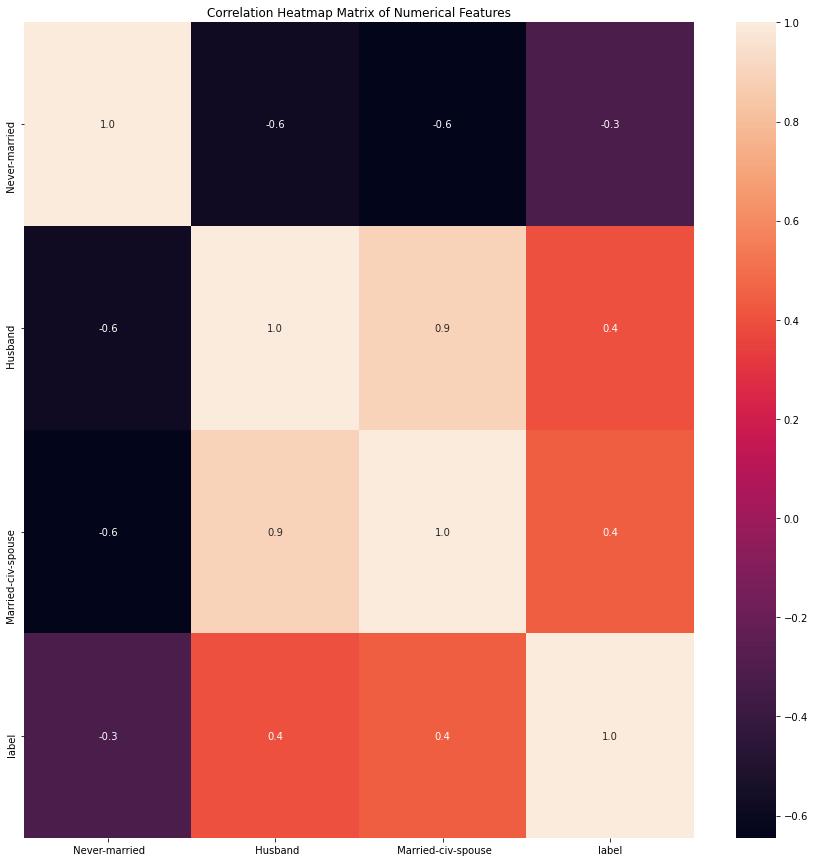

In [17]:
# Correlation Heatmap Matrix of Numerical Features
%matplotlib inline

strong_corrs = abs_corr_coeffs[abs_corr_coeffs > 0.3]
corrmat = numerical_df[strong_corrs.index].corr()

plt.figure(figsize = (15,15))
sns.heatmap(corrmat, fmt = '.1f',annot = True)
plt.title('Correlation Heatmap Matrix of Numerical Features')

In [18]:
corr_df = abs_corr_coeffs.to_frame(name = '50K+ Salary Correlation')
corr_df = corr_df.reset_index()[:-1]
#corr_cols = ['Features','50K+ Salary Correlation']
#corr_df.cols = corr_cols
corr_df.columns = ['Features','50K+ Salary Correlation']
corr_df

,Features,50K+ Salary Correlation
0,Hungary,0.000872
1,Greece,0.001932
2,Assoc-acdm,0.002166
3,Ireland,0.002650
4,Cuba,0.002918
...,...,...
97,hours-per-week,0.229480
98,age,0.241991
99,Never-married,0.320038
100,Husband,0.401227


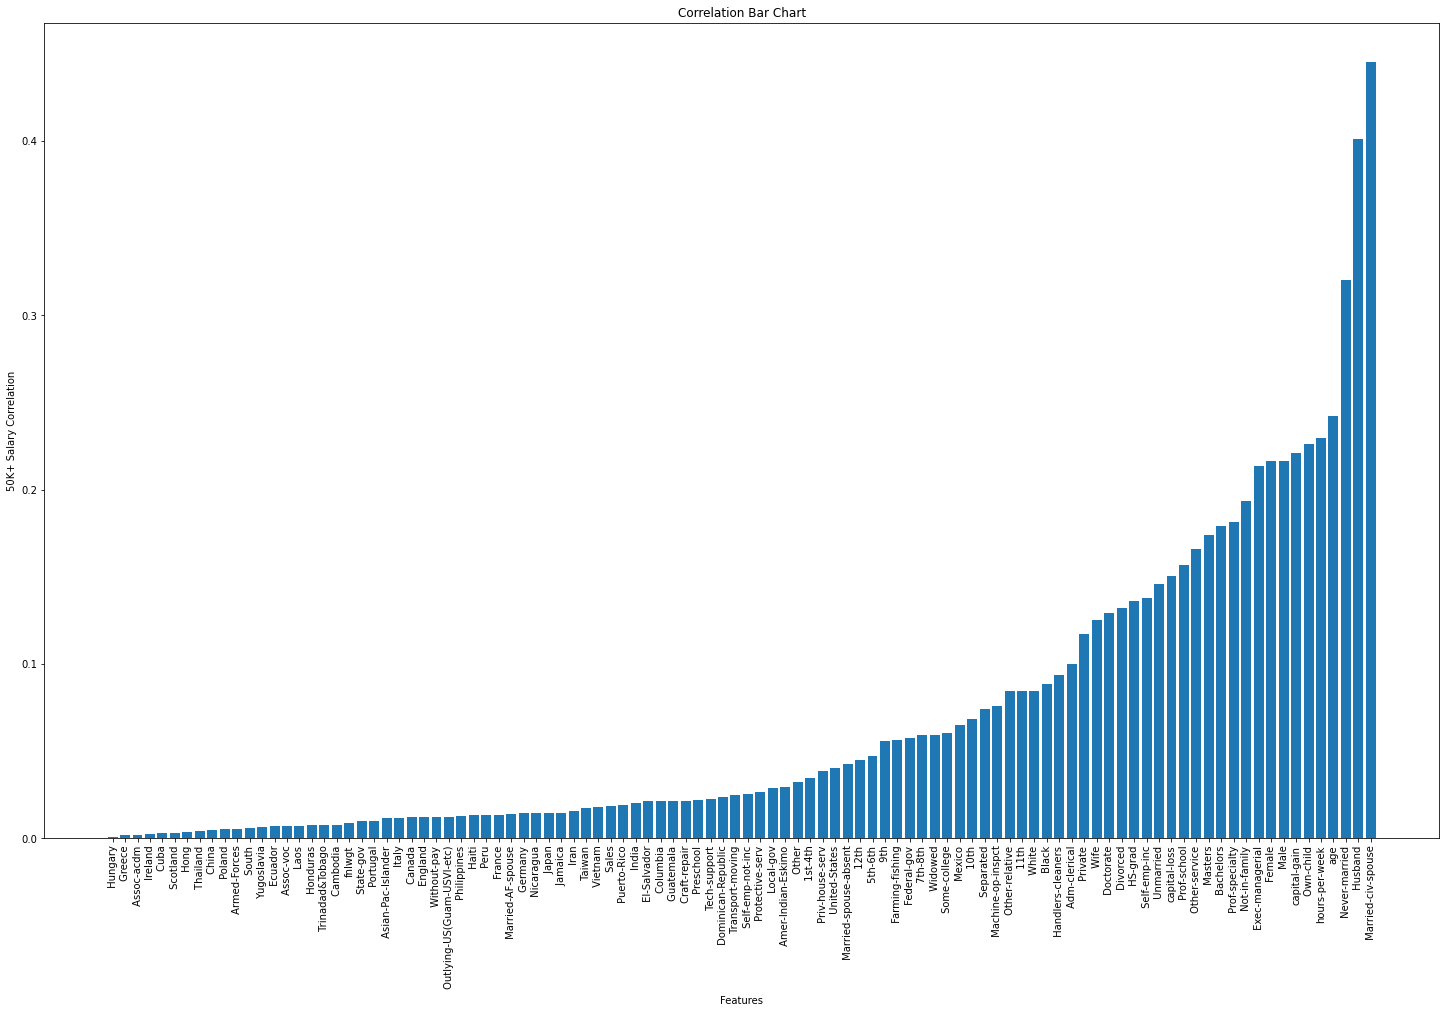

In [19]:
%matplotlib inline

feats = corr_df['Features']
sal_cor = corr_df['50K+ Salary Correlation']


plt.figure(figsize = (25,15))
plt.bar(x = feats, height = sal_cor)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('50K+ Salary Correlation')
plt.title('Correlation Bar Chart')
plt.show()